## Final Project Submission

Please fill out:
* Student name: Seyma Tas
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.linear_model import LogisticRegression, SGDClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import recall_score, f1_score, r2_score, roc_auc_score, roc_curve, auc, cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
import xgboost as xgb
# from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('TelcoCustomerChurnData_cleaned_ohe.csv')

# Splitting the data into test and train sets

In [3]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train = pd.DataFrame(scaled_x_train, columns=X_train.columns)


## Functions to evaluate the model

In [6]:
def roc_curve_and_auc(clf, X_train, X_test, y_train, y_test):

    # Calculate the probability scores of each point in the training set
    y_train_score = clf.fit(X_train, y_train).decision_function(X_train)

    # Calculate the fpr, tpr, and thresholds for the training set
    train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

    # Calculate the probability scores of each point in the test set
    y_test_score = clf.decision_function(X_test)

    # Calculate the fpr, tpr, and thresholds for the test set
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

    # ROC curve for training set
    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(train_fpr, train_tpr, color='darkorange',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='blue',
             lw=lw, label='Test ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve for Training and Testing Sets')
    plt.legend(loc='lower right')
    plt.show()
    # Print the area under the roc curve
    print('Training AUC: {}'.format(round(auc(train_fpr, train_tpr), 5)))
    print('Testing AUC: {}'.format(round(auc(test_fpr, test_tpr), 5)))

In [7]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')



In [8]:
def model_evaluation(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test):

    print('MODEL EVALUATION METRICS:\n',
          '-----------------------------------------------------')
    print('Confusion Matrix for train & test set: \n')
    print(confusion_matrix(y_train, y_pred_train),'\n')
    
    print(confusion_matrix(y_test, y_pred_test))
    
    print('-----------------------------------------------------')
    print('\nClassification Report for train & test set\n',
          '\nTrain set\n',
          classification_report(y_train, y_pred_train),
          '\n\nTest set\n',
          classification_report(y_test, y_pred_test))
    
#     print('\nRecall for train & test set:\n',
#           round(recall_score(y_train, y_pred_train), 4),
#           round(recall_score(y_test, y_pred_test), 4))
       
#     print('Precision for train & test set:\n', 
#           round(precision_score(y_train, y_pred_train), 4),
#           round(precision_score(y_test, y_pred_test), 4))

#     print('f1 score for train & test set:\n', 
#           round(f1_score(y_train, y_pred_train), 4),
#           round(f1_score(y_test, y_pred_test), 4))

#     print('Accuracy for train and test set:\n ',
#           round(accuracy_score(y_train, y_pred_train), 4),
#           round(accuracy_score(y_test, y_pred_test), 4))
    print('-----------------------------------------------------\n')
    print("Cohen's Kappa for train and test set:\n ",
    round(cohen_kappa_score(y_train, y_pred_train), 4),
    round(cohen_kappa_score(y_test, y_pred_test), 4))

    
    print ('roc auc score for train and test set:\n ', round(roc_auc_score(y_train, y_pred_train),4),round(roc_auc_score(y_test, y_pred_test),4) )
   
    
    
    print('Mean Cross Validation Score:\n', round(cross_val_score(clf, X, y, cv=5).mean(), 4))   

# Logistic Regression

## Baseline model

In [49]:
clf = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [51]:
model_evaluation(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)


MODEL EVALUATION METRICS:
 -----------------------------------------------------
Confusion Matrix for train & test set: 

[[3460  403]
 [ 618  793]] 

[[1153  147]
 [ 224  234]]
-----------------------------------------------------

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      3863
           1       0.66      0.56      0.61      1411

    accuracy                           0.81      5274
   macro avg       0.76      0.73      0.74      5274
weighted avg       0.80      0.81      0.80      5274
 

Test set
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.61      0.51      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758

---------------------------------------------

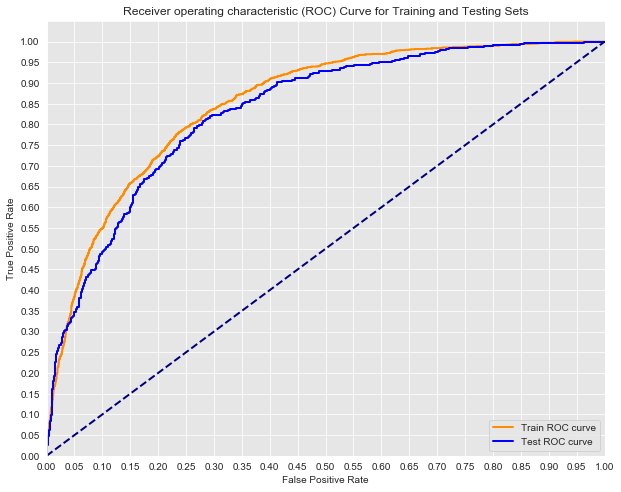

Training AUC: 0.8515
Testing AUC: 0.83351


In [15]:
roc_curve_and_auc(clf, X_train, X_test, y_train, y_test)

In [52]:
clf.coef_.round(2)


array([[-0.06,  0.  ,  0.  , -0.04,  0.24,  0.11, -0.26, -0.54,  0.23,
         0.16,  0.74, -0.1 , -0.1 , -0.48, -0.1 , -0.15, -0.1 , -0.02,
        -0.1 , -0.44, -0.1 ,  0.15, -0.1 ,  0.2 , -0.69, -1.03,  0.22,
        -0.16,  0.21, -0.08]])

In [ ]:
# plot_feature_importances(clf)

### Note: I tried all the other solvers here, 'liblinear' gave the best results.

## Handling Imbalanced Data

## SMOTE


In [12]:
smote = SMOTE()
scaled_X_train_smoted, y_train_smoted = smote.fit_sample(scaled_X_train, y_train)

# L1 regression (Lasso)

In [54]:
clf = SGDClassifier(penalty='l1')
clf.fit(scaled_X_train_smoted, y_train_smoted)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
y_pred_train = clf.predict(scaled_X_train)
y_pred_test = clf.predict(scaled_X_test)

In [56]:
model_evaluation(scaled_X_train, scaled_X_test, y_train, y_test, y_pred_train, y_pred_test)

MODEL EVALUATION METRICS:
 -----------------------------------------------------
Confusion Matrix for train & test set: 

[[2889  974]
 [ 304 1107]] 

[[960 340]
 [111 347]]
-----------------------------------------------------

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      3863
           1       0.53      0.78      0.63      1411

    accuracy                           0.76      5274
   macro avg       0.72      0.77      0.73      5274
weighted avg       0.81      0.76      0.77      5274
 

Test set
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1300
           1       0.51      0.76      0.61       458

    accuracy                           0.74      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.79      0.74      0.76      1758

-------------------------------------------------

MODEL EVALUATION METRICS: SGD SMOTE ELASTICNET
 -----------------------------------------------------
Confusion Matrix for train & test set: 

[[2853 1010]
 [ 281 1130]] 

[[944 356]
 [ 99 359]]
-----------------------------------------------------

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      3863
           1       0.53      0.80      0.64      1411

    accuracy                           0.76      5274
   macro avg       0.72      0.77      0.73      5274
weighted avg       0.81      0.76      0.77      5274
 

Test set
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1300
           1       0.50      0.78      0.61       458

    accuracy                           0.74      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.80      0.74      0.76      1758

-----------------------------------------------------

Cohen's Kappa for train and test set:
  0.4634 0.4316
roc auc score for train and test set:
  0.7697 0.755
Mean Cross Validation Score:
 0.7588

MODEL EVALUATION METRICS: SCD WITHOUT SMOTE
 -----------------------------------------------------
Confusion Matrix for train & test set: 

[[3120  743]
 [ 469  942]] 

[[1047  253]
 [ 163  295]]
-----------------------------------------------------

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      3863
           1       0.56      0.67      0.61      1411

    accuracy                           0.77      5274
   macro avg       0.71      0.74      0.72      5274
weighted avg       0.79      0.77      0.78      5274
 

Test set
               precision    recall  f1-score   support

           0       0.87      0.81      0.83      1300
           1       0.54      0.64      0.59       458

    accuracy                           0.76      1758
   macro avg       0.70      0.72      0.71      1758
weighted avg       0.78      0.76      0.77      1758

-----------------------------------------------------

Cohen's Kappa for train and test set:
  0.4477 0.4226
roc auc score for train and test set:
  0.7376 0.7247
Mean Cross Validation Score:
 0.775

### I tried SGDClassifier without SMOTE. 
I tried SGDClassifier with smote and penalty elastisnet



## SGD Classifier with SMOTE and GRID
## There is a problem in this grid search, if I can not solve it I will try alphas manually

In [57]:
grid = [{'alpha': [1e-06, 1e-05, 0.0001, 0.001], 
         'loss':['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron'],
         'penalty': ['l2', 'l1','elasticnet'],
         'l1_ratio': [0.1, 0.15, 0.2, 0.3, 0.4, 0.5]
         }]

In [58]:
# SGD.get_params().keys()

In [59]:
SGD = SGDClassifier()

clf = GridSearchCV(SGD, grid, cv=3, return_train_score=True)

# Fit the training data
clf.fit(scaled_X_train_smoted, y_train_smoted)


# gridsearch.score(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [1e-06, 1e-05, 0.0001, 0.001],
                          'l1_ratio': [0.1, 0.15, 0.2, 0.3, 0.4, 0.5],
                          'loss': ['hinge', 'log', 'modified_h

In [60]:
y_pred_train = clf.predict(scaled_X_train_smoted)
y_pred_test = clf.predict(X_test)

In [61]:
model_evaluation(scaled_X_train_smoted, scaled_X_test, y_train_smoted, y_test, y_pred_train, y_pred_test)


MODEL EVALUATION METRICS:
 -----------------------------------------------------
Confusion Matrix for train & test set: 

[[2800 1063]
 [ 643 3220]] 

[[   0 1300]
 [   0  458]]
-----------------------------------------------------

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.81      0.72      0.77      3863
           1       0.75      0.83      0.79      3863

    accuracy                           0.78      7726
   macro avg       0.78      0.78      0.78      7726
weighted avg       0.78      0.78      0.78      7726
 

Test set
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1300
           1       0.26      1.00      0.41       458

    accuracy                           0.26      1758
   macro avg       0.13      0.50      0.21      1758
weighted avg       0.07      0.26      0.11      1758

---------------------------------------------

In [ ]:
roc_curve_and_auc(clf,X_train_smoted, X_test, y_train_smoted, y_test)

In [ ]:
clf.feature_importances_

In [ ]:
plot_feature_importances(clf)

In [ ]:
# sns.countplot(y);

In [ ]:
# print(y.value_counts())
# print(y.value_counts(normalize=True))

In [ ]:
# smote = SMOTE()
# X_train_smoted, y_train_smoted = smote.fit_sample(X_train, y_train)

In [ ]:
clf = LogisticRegression(fit_intercept=False, C=1e20, solver ='liblinear')
clf.fit(X_train_smoted, y_train_smoted)



In [ ]:
y_pred_train = clf.predict(X_train_smoted)
y_pred_test = clf.predict(X_test)

In [ ]:
model_evaluation(X_train_smoted, X_test, y_train_smoted, y_test, y_pred_train, y_pred_test)


In [ ]:
roc_curve_and_auc(clf,X_train_smoted, X_test, y_train_smoted, y_test)

In [ ]:
clf.feature_importances_

In [ ]:
plot_feature_importances(clf)

## ADASYN

In [ ]:
adasyn = ADASYN()

In [ ]:
# ADASYN Imbalanced Data


X_train_ada, y_train_ada = adasyn.fit_sample(X_train, y_train)

clf = LogisticRegression(fit_intercept=False, C=1e20, solver ='liblinear')
clf.fit(X_train_ada, y_train_ada)
y_pred_train = clf.predict(X_train_ada)
y_pred_test = clf.predict(X_test)



In [ ]:
model_evaluation(X_train_ada, X_test, y_train_ada, y_test, y_pred_train, y_pred_test)

In [ ]:
roc_curve_and_auc(clf, X_train_ada, X_test, y_train_ada, y_test)

In [ ]:
clf.feature_importances_

In [ ]:
plot_feature_importances(clf)

# We can try to solve multicollinearity by interactions
# We can make grid search to find the best hyperparameters

# KNN

In [ ]:
# k_range = range(1, 26)

# # We can create Python dictionary using [] or dict()
# recall_scores = []

# # We use a loop through the range 1 to 26
# # We append the scores in the dictionary
# for k in k_range:
#     clf = KNeighborsClassifier(n_neighbors=k)
#     clf.fit(X_train, y_train)
#     y_pred_train = clf.predict(scaled_X_train_smoted)
#     y_pred_test = clf.predict(scaled_X_test)
#     scores.append(metrics.recall(y_test, y_pred))

# print(recall_scores)

In [73]:
k_range = range(1, 26)

for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(scaled_X_train_smoted, y_train_smoted)
    y_pred_train = clf.predict(scaled_X_train_smoted)
    y_pred_test = clf.predict(scaled_X_test)
    
    print('------------')
    print('k= ', k)
    print('\nClassification Report for train & test set\n',
              '\nTrain set\n',
              classification_report(y_train_smoted, y_pred_train),
              '\n\nTest set\n',
              classification_report(y_test, y_pred_test))
    print('-----------------------------------------------\n')

------------
1

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3863
           1       1.00      1.00      1.00      3863

    accuracy                           1.00      7726
   macro avg       1.00      1.00      1.00      7726
weighted avg       1.00      1.00      1.00      7726
 

Test set
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1300
           1       0.43      0.52      0.47       458

    accuracy                           0.70      1758
   macro avg       0.63      0.64      0.63      1758
weighted avg       0.72      0.70      0.71      1758

-----------------------------------------------

------------
2

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      3863
           1       1.00      0.9

------------
12

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      3863
           1       0.77      0.91      0.84      3863

    accuracy                           0.82      7726
   macro avg       0.83      0.82      0.82      7726
weighted avg       0.83      0.82      0.82      7726
 

Test set
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      1300
           1       0.45      0.78      0.58       458

    accuracy                           0.70      1758
   macro avg       0.68      0.73      0.67      1758
weighted avg       0.78      0.70      0.72      1758

-----------------------------------------------

------------
13

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.90      0.69      0.78      3863
           1       0.75      0

------------
23

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.89      0.66      0.76      3863
           1       0.73      0.92      0.81      3863

    accuracy                           0.79      7726
   macro avg       0.81      0.79      0.79      7726
weighted avg       0.81      0.79      0.79      7726
 

Test set
               precision    recall  f1-score   support

           0       0.92      0.61      0.73      1300
           1       0.43      0.84      0.57       458

    accuracy                           0.67      1758
   macro avg       0.68      0.73      0.65      1758
weighted avg       0.79      0.67      0.69      1758

-----------------------------------------------

------------
24

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.88      0.68      0.76      3863
           1       0.74      0

In [ ]:
# clf = KNeighborsClassifier(n_neighbors=3)
# clf.fit(scaled_X_train, y_train)

In [ ]:
# y_pred_train = clf.predict(scaled_df_train)
# y_pred_test = clf.predict(scaled_X_test)

In [ ]:
model_evaluation(scaled_df_train, scaled_X_test, y_train, y_test, y_pred_train, y_pred_test)

In [ ]:
# roc_curve_and_auc(clf, X_train, X_test, y_train, y_test)

In [ ]:
clf.feature_importances_

In [ ]:
plot_feature_importances(clf)

## ADASYN

In [ ]:
adasyn = ADASYN()
X_train_ada, y_train_ada = adasyn.fit_sample(scaled_df_train, y_train)

clf = KNeighborsClassifier()

# Fit the classifier
model = clf.fit(X_train_ada, y_train_ada)
y_pred_train = clf.predict(X_train_ada)
y_pred_test = clf.predict(X_test)

In [ ]:
model_evaluation(X_train_ada, X_test, y_train_ada, y_test, y_pred_train, y_pred_test)

# RANDOM FOREST

In [74]:
clf = RandomForestClassifier(random_state=123)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [75]:
model_evaluation(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)

MODEL EVALUATION METRICS:
 -----------------------------------------------------
Confusion Matrix for train & test set: 

[[3850   13]
 [  84 1327]] 

[[1160  140]
 [ 275  183]]
-----------------------------------------------------

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3863
           1       0.99      0.94      0.96      1411

    accuracy                           0.98      5274
   macro avg       0.98      0.97      0.98      5274
weighted avg       0.98      0.98      0.98      5274
 

Test set
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1300
           1       0.57      0.40      0.47       458

    accuracy                           0.76      1758
   macro avg       0.69      0.65      0.66      1758
weighted avg       0.75      0.76      0.75      1758

---------------------------------------------

In [ ]:
# roc_curve_and_auc(clf, X_train, X_test, y_train, y_test)

In [ ]:
clf.feature_importances_.round(5)

In [ ]:
plot_feature_importances(clf)

# RANDOM FOREST smoted

In [76]:
clf = RandomForestClassifier(random_state=123)
clf.fit(scaled_X_train_smoted, y_train_smoted)
y_pred_train = clf.predict(scaled_X_train_smoted)
y_pred_test = clf.predict(scaled_X_test)

In [77]:
model_evaluation(scaled_X_train_smoted, scaled_X_test, y_train_smoted, y_test, y_pred_train, y_pred_test)

MODEL EVALUATION METRICS:
 -----------------------------------------------------
Confusion Matrix for train & test set: 

[[3844   19]
 [  52 3811]] 

[[1117  183]
 [ 216  242]]
-----------------------------------------------------

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3863
           1       1.00      0.99      0.99      3863

    accuracy                           0.99      7726
   macro avg       0.99      0.99      0.99      7726
weighted avg       0.99      0.99      0.99      7726
 

Test set
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1300
           1       0.57      0.53      0.55       458

    accuracy                           0.77      1758
   macro avg       0.70      0.69      0.70      1758
weighted avg       0.77      0.77      0.77      1758

---------------------------------------------

In [ ]:
# roc_curve_and_auc(clf, X_train, X_test, y_train, y_test)

In [ ]:
clf.feature_importances_.round(5)

In [ ]:
plot_feature_importances(clf)

# Grid search

In [78]:
grid = [{'criterion': ['gini', 'entropy'], 
         'n_estimators':[10, 20, 50, 100, 150, 200],
         'max_depth': [3, 4, 5, 6, 7],
         'min_samples_split': [1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
         'min_samples_leaf': [1,2, 3,4, 5,6,7, 8, 9, 10]}]

In [79]:
RF = RandomForestClassifier(random_state=123)

In [80]:
clf = GridSearchCV(estimator= RF, param_grid=grid, scoring={
                          'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}, cv=5, refit='Accuracy')

In [ ]:
# RF.get_params().keys()

In [ ]:
# Fit the training data
clf.fit(scaled_X_train_smoted, y_train_smoted)
y_pred_train = clf.predict(scaled_X_train_smoted)
y_pred_test = clf.predict(scaled_X_test)

In [ ]:
gridsearch.score(X_train, y_train)
gridsearch.score(X_test, y_test)

In [ ]:
gridsearch.best_params_

In [ ]:
gridsearch.best_score_


# Bagging Classifier

In [21]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5, 0.75, 1.0]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, n_jobs=-1)

clf.fit(scaled_X_train_smoted, y_train_smoted)
y_pred_train = clf.predict(scaled_X_train_smoted)
y_pred_test = clf.predict(scaled_X_test)

In [9]:
# clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
#                                  n_estimators=20)

In [10]:
# clf.fit(X_train, y_train)
# y_pred_train = clf.predict(X_train)
# y_pred_test = clf.predict(X_test)

In [23]:
model_evaluation(scaled_X_train_smoted, scaled_X_test, y_train_smoted, y_test, y_pred_train, y_pred_test)

MODEL EVALUATION METRICS:
 -----------------------------------------------------
Confusion Matrix for train & test set: 

[[3009  854]
 [ 540 3323]] 

[[973 327]
 [114 344]]
-----------------------------------------------------

Classification Report for train & test set
 
Train set
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      3863
           1       0.80      0.86      0.83      3863

    accuracy                           0.82      7726
   macro avg       0.82      0.82      0.82      7726
weighted avg       0.82      0.82      0.82      7726
 

Test set
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1300
           1       0.51      0.75      0.61       458

    accuracy                           0.75      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.80      0.75      0.76      1758

-------------------------------------------------

In [25]:
# roc_curve_and_auc(clf, X_train, X_test, y_train, y_test)

# SVM classifier

In [26]:
clf = SVC(kernel='linear')
# clf= SVC(kernel='linear', 
#             class_weight='balanced', 
#             probability=True)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

KeyboardInterrupt: 

In [ ]:
model_evaluation(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)

In [ ]:
roc_curve_and_auc(clf, X_train, X_test, y_train, y_test)

# Naive Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
model_evaluation(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)

In [ ]:
# roc_curve_and_auc(clf, X_train, X_test, y_train, y_test)

In [ ]:
clf.feature_importances_

In [ ]:
plot_feature_importances(clf)

# Xgboost

In [ ]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
model_evaluation(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)

In [ ]:
# roc_curve_and_auc(clf, X_train, X_test, y_train, y_test)

In [ ]:
clf.feature_importances_.round(5)

In [ ]:
plot_feature_importances(clf)

# Gradient Boosting

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
model_evaluation(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)

In [ ]:
roc_curve_and_auc(clf, X_train, X_test, y_train, y_test)

In [ ]:
clf.feature_importances_.round(5)

In [ ]:
plot_feature_importances(clf)

# Adaboost

In [ ]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
model_evaluation(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)

In [ ]:
roc_curve_and_auc(clf, X_train, X_test, y_train, y_test)

In [ ]:
clf.feature_importances_

In [ ]:
plot_feature_importances(clf)

Feature Importance
Class Weight
Over Under SAmpling SMOTE yaptim
Stratify
Radius Neighbors Classifier Cok fazla model oldu
bagging yaptim
make_scorer

simple imputer
n_jobs = -1

cohen_kappa_score
Cohen suggested the Kappa result be interpreted as follows: values ≤ 0 as indicating no agreement and 0.01–0.20 as none to slight, 0.21–0.40 as fair, 0.41– 0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1.00 as almost perfect agreement.

Ambere sorulacaklar
ADASYN
KNN results interpret


In [ ]:
# Plot features importances metric evaluation fonksiyonuna bunu ekleyecegim
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')